# Prediction Error Methods for System Identification

In system identification: how to handle the sensor noise and the process disturbances is the key issue

So far: if it is possible to perform experiments on the system, use periodic excitation. Because then you can use averaging to minimize the effect of the noise. 

This only works if you have periodic excitation.

The prediction error methods are based on filtering the noise. 

# Data Generating System

The data is assumed to be generated by a system of the form:
$$
y(t) = g(t)*u(t) + v(t),
$$
where
- $g(t)$ is the impulse response of the system,
- $v(t)$ is the noise term.



# Aside on Denoting Convolution in Time-Domain

Before we continue, I would like to take a moment to introduce some new notation. In system identification we are often dealing with time-domain data, so we wish to express our equations in time-domain. In addition, the signals that we have often cannot be expressed in Z-domain. On the otherhand however, we are often wishing to estimate a transfer function, which can more easily be expressed in Z-domain. In the above equation, the plant was represented using its impulse response, and the output is calculated by convolving the input with the plant impulse response. This is not convenient. 

Therefore, we will use a more concise notation for convolution. 

Start with the normal way of expressing convolution in time domain:
$$
\begin{align*}
y(t) &= g(t)*u(t)\\
&=\sum_{\tau}^{\infty} g(\tau)u(t-\tau) 
\end{align*}
$$
where the second equation follows by using the defintion of convolution. Now consider a delay-operator. We will denote it using $q$, and it works as follows:
$$
q^{-1}u(t) = u(t-1).
$$
So multiplying a time domain signal by the operator $q^{-1}$ delays the signal by one time step. Similarly, multiplying a signal by $q^{-5}$ delays the singal by 5 time steps:
$$
q^{-5}u(t) = u(t-5).
$$
Using this operator in the expression for $y$ we have:
$$
y(t)&=\sum_{\tau}^{\infty} g(\tau)q^{-\tau}u(t) \\
&= G(q)u(t)
$$
where the second equality follows by the definition of the Z-transform and $G(z) = \mathcal{Z}[g(t)]$. 

We will use the $q$-operator notation extensively since it makes the expressions much cleaner, and it allows us to think about transfer functions and time-domain signals in the same equation. 






# Assumptions about the noise $v$

The noise is an unknown signal. Need to make some assumptions about it. 

It should be modelled as a stochastic (random) process because we can't know exactly what it's value will be.

The typical assumption is that $v(t)$ can be modelled as a filtered white noise:
$$
v(t) = H(q)e(t),
$$
It can be shown that many types of noise can be accurately modelled in this way.

Additional assumptions:
- $H(q)$ is stable
- $H(q)$ is monic
- the inverse of $H(q)$ is stable
- the inverse of $H(q)$ is monic

Stable noise model makes sense, because the noise term does not normally grow infinitely large.

*Monic* means that the direct feed through term in the impulse response is equal to $1$:
$$
h(t) = 1 + h_1\delta(t-1) + h_2\delta(t-2) + \cdots
$$
Or in z-domain:
$$
H(z) = \frac{1 + b_1z^{-1}+b_2z^{-2}+ \cdots + b_{n_b}z^{-n_b}}{1 + a_1z^{-1}+a_2z^{-2}+ \cdots + a_{n_a}z^{-n_a}}
$$
Then, from Z-Transform table (initial value theorem) we have that:
$$
\begin{align*}
h_0 &= \lim_{z\to \infty} H(z) \\
&= \lim_{z\to \infty} \frac{1 + b_1z^{-1}+b_2z^{-2}+ \cdots + b_{n_b}z^{-n_b}}{1 + a_1z^{-1}+a_2z^{-2}+ \cdots + a_{n_a}z^{-n_a}} \\
&= 1
\end{align*}
$$
Why is it important to have a monic noise model?

It is a type of normalization. It ensures that $H(z)$ and $e(t)$ are uniquely defined. For example, consider:
$$
v(t) = H(q)e(t)
$$
Both $e$ and $H$ are unknown. So I can scale $H(t)$ by $a$ and scale $e(t)$ by $1/a$ without changing the value of $v(t)$:
$$
v(t) = \Big( aH(q) \Big )* \frac{ e(t)}{a}
$$
However, after scaling, $aH(q)$ is not monic. The point is: the assumption that the noise model is monic ensures its uniqueness.

Often we need to inverse the noise model. So we need the inverse of the noise model to be stable as well. What is the inverse noise model?
$$
H^{-1}(z)H(z) = 1
$$
So $H^{-1}(z)$ is the inverse noise model. In time domain:
$$
h^i(t)*h(t) = \delta(t)
$$
where $h^i$ is the impulse response of the inverse noise model, i.e. $h^i(t)$ is the impulse reponse of $H^{-1}(z)$:
$$
h^i(t) = \mathcal{Z}^{-1}[H^{-1}(z)]
$$


Some examples of noise models that satisfy these assumptions:
$$
H(z) = \frac{1-z_1z^{-1}}{1-p_1z^{-1}},
$$
where $z_1$ and $p_1$ are both in the unit circle.



Filter 1:
numerator: [1. 2. 1.]
denominator: [ 1.00000000e+00 -1.11022302e-16  1.71572875e-01]

Filter 2:
numerator: [1. 2. 1.]
denominator: [ 1.         -1.77863178  0.80080265]


Text(0.5, 0, 'Time (s)')

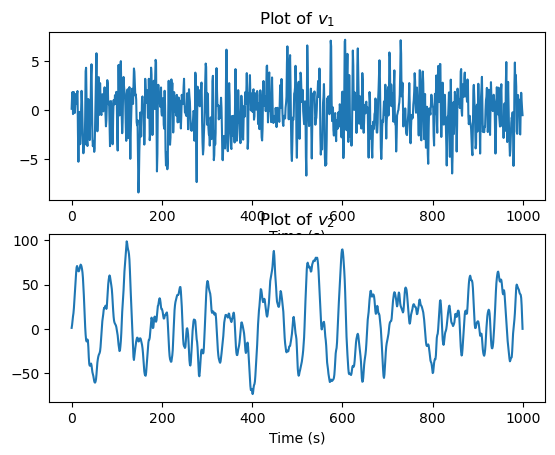

In [12]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

N = 1000
b, a = sp.signal.butter(2, 0.5, 'low')

b /= b[0]
print('Filter 1:')
print('numerator:', b)
print('denominator:', a)

v1 = sp.signal.lfilter(b, a, np.random.randn(N)) 

b, a = sp.signal.butter(2, 0.05, 'low')

b /= b[0]
print('\nFilter 2:')
print('numerator:', b)
print('denominator:', a)

v2 = sp.signal.lfilter(b, a, np.random.randn(N))
 
fig,ax = plt.subplots(2,1)
ax[0].plot(v1)
ax[0].set_title('Plot of $v_1$')
ax[0].set_xlabel('Time (s)')
ax[1].plot(v2)
ax[1].set_title('Plot of $v_2$')
ax[1].set_xlabel('Time (s)')


# One-Step-Ahead Prediction of $y(t)$

# Given the system $y(t)=G(q)u(t) + H(q)e(t)$, and given the observations $\{ y(s), u(s), s<=t-1\}$; what is the best prediction of $y(t)$?



# Analyse the System

Assume that $G$ has a delay, i.e. the impulse response of $G$ is
$$
g(t) = \sum_{k=1}^{\infty} g_k \delta(t-k),
$$
i.e. $g_0=0$. 

Then we can write:
$$
\begin{align*}
y(t) &= G(q)u(t) + H(q)e(t) \\
&= G(q)u(t) + (H(q)- 1)e(t) + e(t). \\
\end{align*}
$$
Note that the first two terms are functions of the past:
$$
\begin{align*}
y(t) &= \sum_{\tau=-\infty}^{\infty} \sum_{k=1}^{\infty} g_k \delta(\tau-k) u(t-\tau) + \sum_{\tau=-\infty}^{\infty} \sum_{k=1}^{\infty} h_k \delta(\tau-k) e(t-\tau) + e(t) \\
&= \sum_{k=1}^{\infty} g_k u(t-k) + \sum_{k=1}^{\infty} h_k e(t-k) + e(t)
\end{align*}
$$

Suppose we know the past of $u$ and $y$, i.e. we know $u(t-k)$, $y(t-k)$, $k=1, 2, 3, \ldots$. Does this mean that we know $e(t-k)$, $k=1,2,3,\ldots$?
Yes!
$$
\begin{align*}
y(t) &= G(q)u(t) + H(q)e(t) \\
H(q)e(t) &= y(t) - G(q)u(t) 
\end{align*}
$$
Multiply both sides by $H(q)^{-1}$ (recall that $h^i(t)*h(t)=\delta(t)$):
$$
\begin{align*}
H^{-1}(q)H(q)e(t) &= H^{-1}(q) \Big ( y(t) - G(q)u(t) \Big ) \\
&= H^{-1}(q) y(t) - H^{-1}(q)G(q)u(t)
\end{align*}
$$
which can be expressed as:
$$
e(t) = \sum_{k=0}^{\infty} h^i_k y(t-k) - \sum_{k=0}^{\infty} f_k u(t-k),
$$
where $f_k = \sum_{\tau=0}^{\infty} h^i_{\tau} g_{k-\tau}$.

Conclusion 1: if we know $y(t-k)$ and $u(t-k)$ for $k=0,1,2,\ldots,\infty$, then we know $e(t)$. 

Conclusion 2: $e(t-1)$ only depends on $y(t-k)$ and $u(t-k)$ for $k=1,2,\ldots,\infty$. This can be shown:
$$
\begin{align*}
e(t-1) &= \sum_{k=0}^{\infty} h^i_k y(t-1-k) - \sum_{k=0}^{\infty} f_k u(t-1-k) \\
&= H^{-1}(q) y(t-1) - H^{-1}(q)G(q)u(t-1)
\end{align*}
$$

Putting it all together, we have:
$$
\begin{align*}
y(t) &= G(q)u(t) + (H(q)- 1)e(t) + e(t) \\
&= G(q)u(t) + (H(q) - 1)\Big( H^{-1}(q) y(t) - H^{-1}(q)G(q)u(t) \Big ) + e(t) \\
&= G(q)u(t) + (1 - H^{-1}(q))y(t) - G(q)u(t) + H^{-1}(q)G(q)u(t) + e(t)  \\
&= H^{-1}(q)G(q)u(t) + \Big (1 - H^{-1}(q) \Big )y(t) + e(t)
\end{align*}
$$
Again, the first two terms depend only on $u(t-k)$, $y(t-k)$, $k=1, 2, \ldots$.

So, the expected value of $y(t)$, given $u(t-k)$, $y(t-k)$ are known is equal to:
$$
\begin{align*}
\mathbb{E}[y(t) | y(t-k), u(t-k), k=1,2,\ldots] &= \mathbb{E}\Big [H^{-1}(q)G(q)u(t) + \Big(1 - H^{-1}(q) \Big)y(t) + e(t) \Big] \\
&= H^{-1}(q)G(q)u(t) + \Big(1 - H^{-1}(q) \Big)y(t)
\end{align*}
$$




# Predictor

Let $\hat{y}(t | t-1)$ denote the predicted value of $y(t)$:
$$
\hat{y}(t|t-1) = H^{-1}(q)G(q)u(t) + \Big(1 - H^{-1}(q) \Big)y(t)
$$

However, now suppose that we parameterize the transfer functions $G$ and $H$:
$$
\hat{y}(t|t-1,\theta) = H^{-1}(q,\theta)G(q,\theta)u(t) + \Big(1 - H^{-1}(q,\theta) \Big)y(t)
$$
This is a famous equation! It is called a *predictor*. 



# Prediction Error

The prediction error can be expressed as:
$$
\varepsilon(t,\theta) = y(t) - \hat{y}(t|t-1,\theta)
$$
We want to find the parameter $\theta$ such that the prediction of $y$, (i.e. $\hat{y}$) is as good as possible.